In [2]:
!pip3 install opencv-python

import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os 
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


In [3]:
img = image.load_img("/Users/ussie/Desktop/Injam/injam/Training/Real/Image99.jpg")

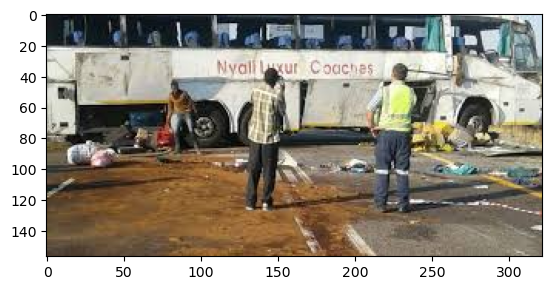

In [4]:
plt.imshow(img)

In [5]:
cv2.imread("/Users/ussie/Desktop/Injam/injam/Training/Real/Image99.jpg").shape

(157, 322, 3)

In [6]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [7]:
train_dataset = train.flow_from_directory("/Users/ussie/Desktop/Injam/injam/Training/", target_size = (200,200), batch_size = 3, class_mode = "binary")
validation_dataset = train.flow_from_directory("/Users/ussie/Desktop/Injam/injam/Validation/", target_size = (200,200), batch_size = 3, class_mode = "binary")

Found 110 images belonging to 2 classes.
Found 108 images belonging to 2 classes.


In [8]:
train_dataset.class_indices

{'Fake': 0, 'Real': 1}

In [9]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [10]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape = (200,200,3))
                                    ,tf.keras.layers.MaxPool2D(2,2),
                                    # increasing number of chanels
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation= 'relu'),
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')

])

2023-08-02 23:15:00.006829: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-08-02 23:15:00.006858: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-08-02 23:15:00.006861: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-08-02 23:15:00.007167: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-02 23:15:00.007495: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=0.001), metrics=['accuracy'])


In [12]:
model_fit = model.fit(train_dataset, steps_per_epoch = 3, epochs=10, validation_data=validation_dataset)

Epoch 1/10


2023-08-02 23:15:01.160924: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 3s 197ms/step - loss: 13.5380 - accuracy: 0.5556 - val_loss: 0.3482 - val_accuracy: 0.9074


2023-08-02 23:15:03.694119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch 2/10
3/3 [==============================] - 1s 325ms/step - loss: 0.0813 - accuracy: 1.0000 - val_loss: 1.0428 - val_accuracy: 0.9074
Epoch 3/10
3/3 [==============================] - 0s 121ms/step - loss: 8.0533e-05 - accuracy: 1.0000 - val_loss: 1.1803 - val_accuracy: 0.9074
Epoch 4/10
3/3 [==============================] - 0s 99ms/step - loss: 1.5941 - accuracy: 0.8889 - val_loss: 0.3556 - val_accuracy: 0.9074
Epoch 5/10
3/3 [==============================] - 0s 102ms/step - loss: 0.5413 - accuracy: 0.8889 - val_loss: 0.3653 - val_accuracy: 0.9074
Epoch 6/10
3/3 [==============================] - 0s 101ms/step - loss: 0.2234 - accuracy: 0.8889 - val_loss: 0.3525 - val_accuracy: 0.9074
Epoch 7/10
3/3 [==============================] - 0s 103ms/step - loss: 0.7976 - accuracy: 0.7778 - val_loss: 0.4012 - val_accuracy: 0.9074
Epoch 8/10
3/3 [==============================] - 0s 112ms/step - loss: 0.6325 - accuracy: 0.8889 - val_loss: 0.4658 - val_accuracy: 0.9074
Epoch 9/10
3/3 [=

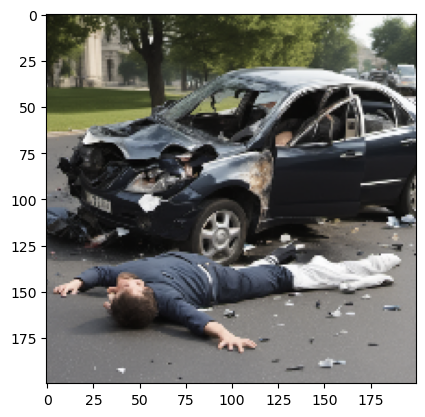

1/1 [==============================] - 0s 9ms/step
Fake


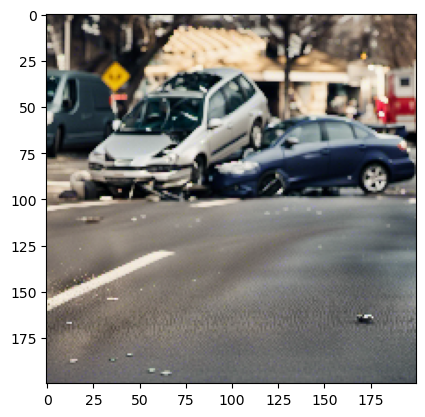

1/1 [==============================] - 0s 10ms/step
Fake


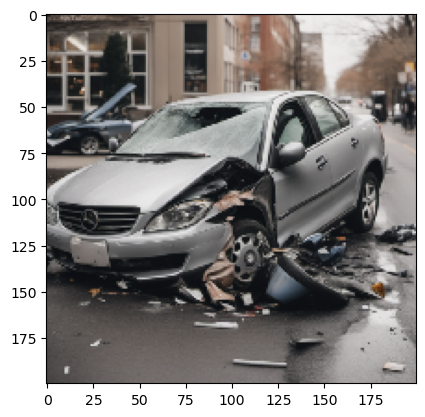

1/1 [==============================] - 0s 10ms/step
Fake


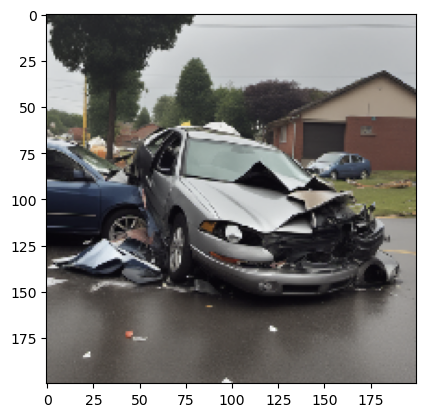

1/1 [==============================] - 0s 10ms/step
Fake


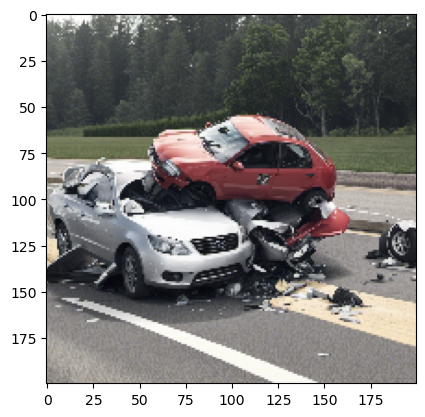

1/1 [==============================] - 0s 9ms/step
Fake


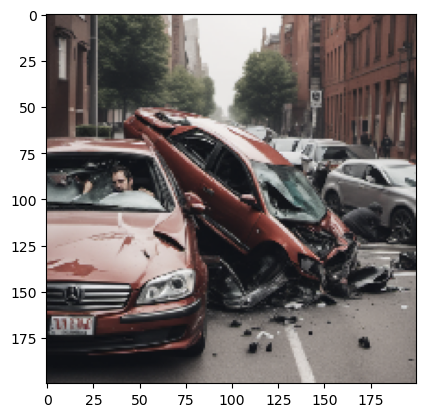

1/1 [==============================] - 0s 9ms/step
Fake


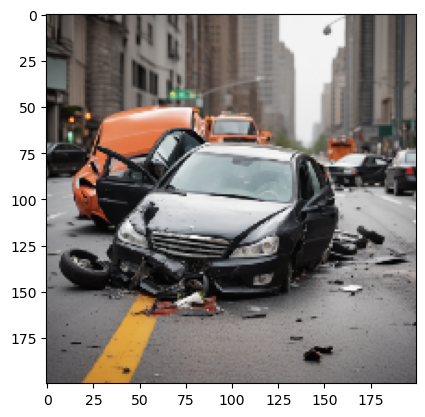

1/1 [==============================] - 0s 26ms/step
Fake


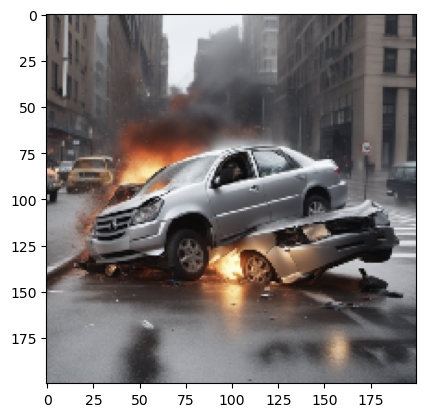

1/1 [==============================] - 0s 9ms/step
Fake


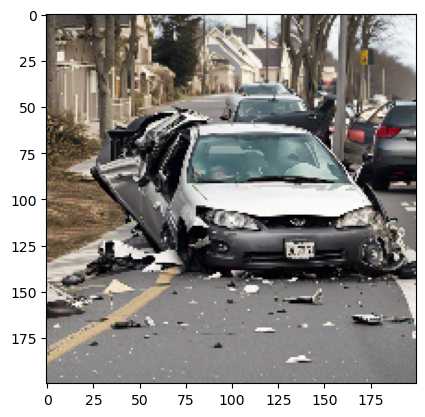

1/1 [==============================] - 0s 8ms/step
Fake


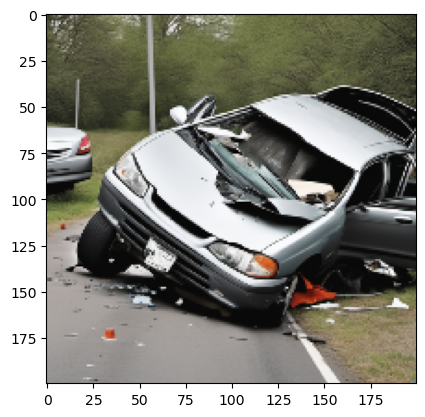

1/1 [==============================] - 0s 9ms/step
Fake


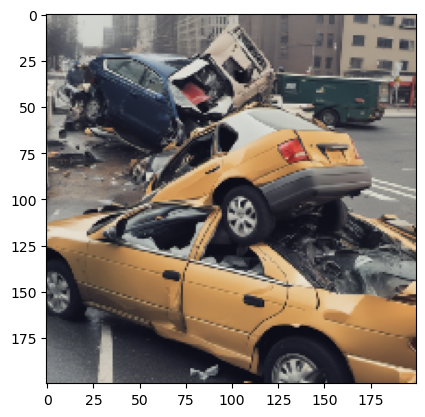

1/1 [==============================] - 0s 10ms/step
Fake


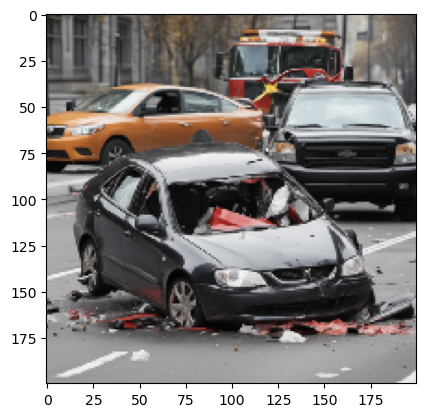

1/1 [==============================] - 0s 9ms/step
Fake


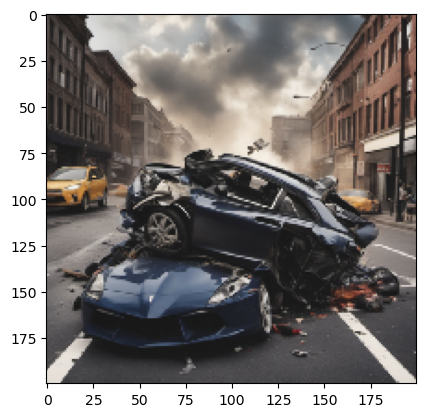

1/1 [==============================] - 0s 8ms/step
Fake


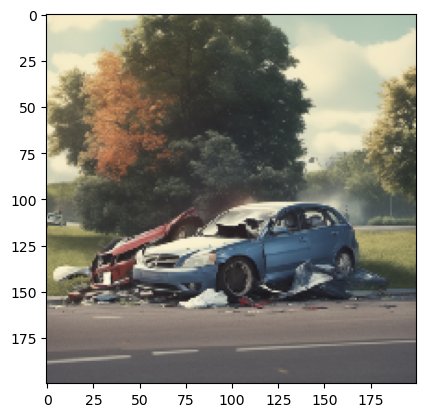

1/1 [==============================] - 0s 8ms/step
Fake


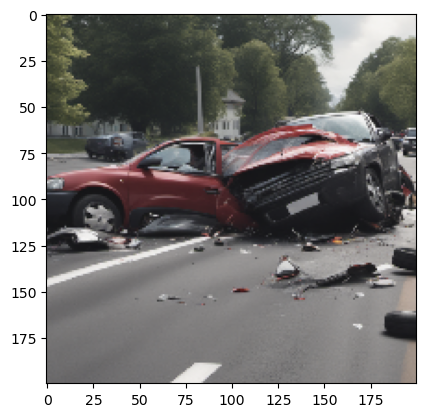

1/1 [==============================] - 0s 12ms/step
Fake


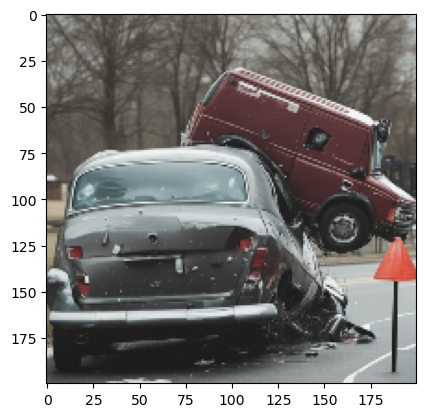

1/1 [==============================] - 0s 9ms/step
Fake


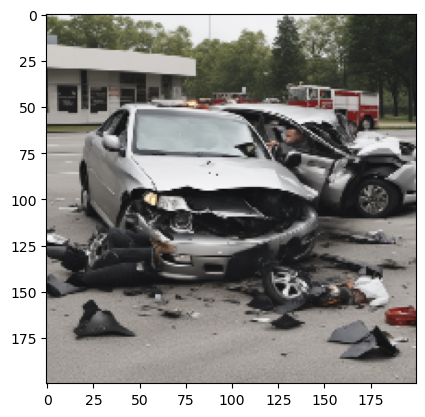

1/1 [==============================] - 0s 9ms/step
Fake


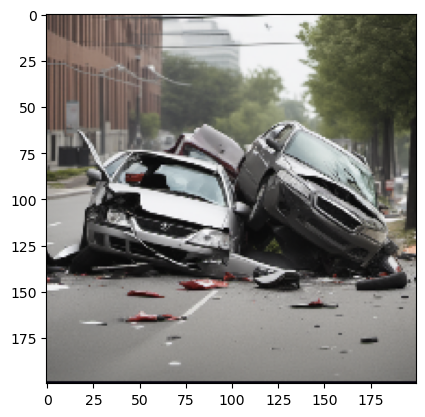

1/1 [==============================] - 0s 10ms/step
Fake


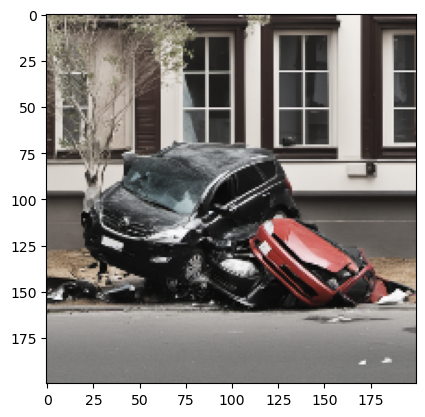

1/1 [==============================] - 0s 9ms/step
Fake


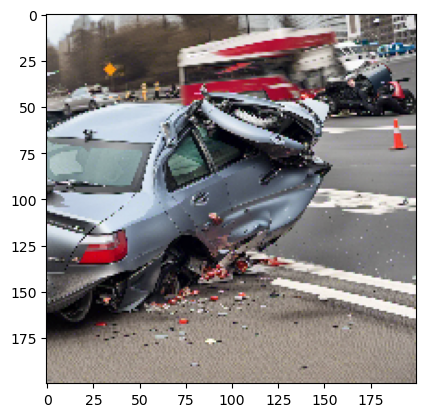

1/1 [==============================] - 0s 8ms/step
Fake


In [29]:
dir_path = "/Users/ussie/Desktop/Injam/injam/Test/Fake"
for i in os.listdir(dir_path):
    if i != ".DS_Store":
        img = image.load_img(dir_path+ '//'+i, target_size=(200,200))
        plt.imshow(img)
        plt.show()
        X = image.img_to_array(img)
        X = np.expand_dims(X, axis=0)
        images = np.vstack([X])
        val = model.predict(images)
        if val == 1:
            print("Fake")
        else:
            print("Real")